In [1]:
import numpy as np
import pandas as pd

data_pca = pd.read_csv('pca_processed_aft_ca.csv')
data_ca =  pd.read_csv('customer_aggregated_features.csv')


In [12]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,cluster
0,-0.047115,-0.631844,-0.539490,0.425060,1.585983,-0.599916,-1.489204,-0.432797,-0.574893,-1.315930,...,1.234094,0.254578,-0.828144,-0.194753,0.615129,-0.304225,0.057564,0.015721,0.003022,3
1,-1.822326,0.762175,0.108784,0.080947,-0.465687,0.061052,0.038082,-0.041026,-0.909665,-0.251628,...,-0.013557,-0.197036,-0.915602,-0.074462,0.099017,-0.446328,0.047463,-0.002397,0.004050,3
2,0.580512,0.154399,-1.572487,0.278287,-1.752836,-0.334993,-0.727812,-1.185987,0.726998,-0.522607,...,-0.482483,0.445780,1.205035,0.110486,0.177528,-0.653389,0.072665,-0.028691,0.011504,3
3,-1.194437,-0.354433,0.026938,1.617124,0.406080,-0.494058,0.814764,-0.964508,0.452258,-0.017693,...,-0.181148,0.072253,0.371021,-0.007239,-1.050876,0.413364,0.080340,-0.032407,0.013969,3
4,-0.060302,0.776367,0.890797,1.019816,-0.709632,-0.276703,-0.041817,-0.996211,0.391139,-0.300021,...,0.444534,-0.167952,-1.206678,0.190770,0.068674,1.242565,0.101942,0.062634,-0.004931,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,-0.931085,0.037474,-0.392423,0.812177,0.198447,0.286933,0.461846,0.821614,0.245630,0.263384,...,1.045956,0.194659,0.115088,-0.231099,-0.863906,-0.309408,-0.048693,-0.076974,0.000603,3
6061,-0.377734,-2.278180,-1.711797,1.787202,-1.206685,0.650335,-0.089167,0.465928,-0.658724,-0.135675,...,-0.695811,0.018558,-0.121260,0.075093,-1.090569,-0.129745,-0.065993,-0.029079,0.013131,3
6062,2.219776,-3.843190,-1.612836,3.318933,1.534494,1.789674,1.149973,-1.318952,1.236860,-1.465291,...,-0.466974,0.162945,2.082623,1.016426,1.457681,1.595473,0.048592,-0.222419,-0.110212,-1
6063,-0.058120,1.453663,-0.036625,-1.599369,-0.330901,-0.514710,-0.615372,0.756834,1.319525,0.416384,...,0.033902,0.189419,-0.516100,0.159192,0.068472,0.646754,0.132705,0.054228,-0.003620,3


In [13]:
data_ca

,num_orders,avg_price,total_spend,avg_freight,total_freight,avg_product_name_len,avg_product_desc_len,avg_product_photos,avg_product_weight,avg_product_length,...,order_failure_rate,avg_review_score,review_rate,avg_review_length,avg_purchase_hour,weekend_ratio,avg_approval_delay,avg_shipping_delay,avg_delivery_duration,avg_delivery_vs_estimate
0,-0.290506,0.022765,-0.053119,-0.509428,-0.499668,1.014047,-0.830458,-0.690713,-0.158389,0.256390,...,-0.111855,0.684423,1.202795,1.719143,-0.903648,-0.548681,-0.389463,-0.258059,-0.549936,0.705044
1,-0.290506,-0.558056,-0.564134,-0.743480,-0.661797,0.682209,-0.219668,-0.690713,-0.459890,-0.239320,...,-0.111855,-0.038377,-0.837063,-0.586252,-0.714688,-0.548681,-0.121959,-0.296600,-0.929589,0.693516
2,-0.290506,-0.295902,-0.333486,-0.180114,-0.271552,0.101493,-0.920775,0.454590,-0.158389,-0.301284,...,-0.111855,-0.761176,-0.837063,-0.586252,1.174908,-0.548681,-0.398934,-0.034714,1.595763,0.979521
3,-0.290506,-0.520957,-0.531493,-0.154248,-0.253635,-0.396263,1.473398,1.599893,-0.520190,-0.673066,...,-0.111855,-0.038377,1.202795,-0.337020,0.985949,-0.548681,-0.386433,-0.517265,1.130988,0.007031
4,-0.290506,0.284920,0.177529,-0.200933,-0.285973,0.848128,0.023729,0.454590,1.061012,-0.858958,...,-0.111855,0.684423,-0.837063,-0.586252,0.796989,-0.548681,-0.385434,-0.226621,0.215339,0.414620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24238,-0.290506,-0.364972,-0.394256,-0.523307,-0.509282,-0.645141,-0.161498,-0.118062,0.303911,0.070499,...,-0.111855,-2.929574,-0.837063,-0.586252,-0.336769,1.840579,-0.387943,-0.516178,-0.236378,-0.302860
24239,-0.290506,-0.458637,-0.476663,-0.716353,-0.643006,0.018534,-0.655946,-0.690713,-0.493390,-0.858958,...,-0.111855,-0.038377,-0.837063,-0.586252,0.796989,1.840579,-0.388262,0.103402,-0.950014,0.521662
24240,-0.290506,1.069814,0.868089,0.072234,-0.096751,1.014047,2.855711,2.172544,-0.453190,0.256390,...,-0.111855,0.684423,1.202795,0.119905,-0.525729,-0.548681,-0.382128,-0.492342,-0.381320,-0.925354
24241,-0.290506,0.336723,0.223106,0.110086,-0.070531,-0.479223,-0.766164,-0.118062,0.163211,1.867448,...,-0.111855,-0.038377,-0.837063,-0.586252,1.174908,1.840579,-0.368182,0.008005,1.377336,0.911793


In [2]:


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)

import hdbscan
import matplotlib.pyplot as plt


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [3]:
# we will first create a evaulation function
def evaluate_clustering(X, labels, model_name):
    result = {
        "model": model_name,
        "n_clusters": len(set(labels)) - (1 if -1 in labels else 0),
        "noise_ratio": (labels == -1).mean() if -1 in labels else 0.0
    }

    # ignore noise points for metric computation
    mask = labels != -1

    if result["n_clusters"] > 1 and mask.sum() > 1:
        result["silhouette"] = silhouette_score(X[mask], labels[mask])
        result["davies_bouldin"] = davies_bouldin_score(X[mask], labels[mask])
        result["calinski_harabasz"] = calinski_harabasz_score(X[mask], labels[mask])
    else:
        result["silhouette"] = np.nan
        result["davies_bouldin"] = np.nan
        result["calinski_harabasz"] = np.nan

    return result


In [4]:
# now the metrics ready we will now build a single function so taht that we can pass differnt data to it
def run_unsupervised_pipeline(X):
    results = []

    #  KMeans
    for k in [3, 5, 7, 10]:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = km.fit_predict(X)
        results.append(evaluate_clustering(X, labels, f"KMeans_k={k}"))

    # Gaussian Mixture
    for k in [3, 5, 7, 10]:#(accepted numbers)
        gmm = GaussianMixture(n_components=k, random_state=42)
        labels = gmm.fit_predict(X)
        results.append(evaluate_clustering(X, labels, f"GMM_k={k}"))

    # HDBSCAN
    hdb = hdbscan.HDBSCAN(
        min_cluster_size=50,
        min_samples=10
    )
    labels = hdb.fit_predict(X)
    results.append(evaluate_clustering(X, labels, "HDBSCAN"))

    return pd.DataFrame(results)
print('done')

done


In [6]:
# now lets get started with PCA Dataset first
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_pca = imputer.fit_transform(data_pca)

results_pca = run_unsupervised_pipeline(X_pca)

results_pca.sort_values(
    by=["silhouette", "calinski_harabasz"],
    ascending=False
)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,model,n_clusters,noise_ratio,silhouette,davies_bouldin,calinski_harabasz
0,KMeans_k=3,3,0.000000,0.413608,1.536655,558.873719
8,HDBSCAN,4,0.155812,0.366722,0.914734,322.990325
2,KMeans_k=7,7,0.000000,0.110789,1.981855,457.253534
3,KMeans_k=10,10,0.000000,0.101485,1.709527,425.523355
1,KMeans_k=5,5,0.000000,0.099018,2.028390,518.200284
4,GMM_k=3,3,0.000000,0.091113,3.502609,225.733647
7,GMM_k=10,10,0.000000,0.079863,2.974875,244.460512
5,GMM_k=5,5,0.000000,0.074765,2.876730,286.591035
6,GMM_k=7,7,0.000000,0.042847,3.564973,223.090485


In [7]:
results_pca

,model,n_clusters,noise_ratio,silhouette,davies_bouldin,calinski_harabasz
0,KMeans_k=3,3,0.000000,0.413608,1.536655,558.873719
1,KMeans_k=5,5,0.000000,0.099018,2.028390,518.200284
2,KMeans_k=7,7,0.000000,0.110789,1.981855,457.253534
3,KMeans_k=10,10,0.000000,0.101485,1.709527,425.523355
4,GMM_k=3,3,0.000000,0.091113,3.502609,225.733647
5,GMM_k=5,5,0.000000,0.074765,2.876730,286.591035
6,GMM_k=7,7,0.000000,0.042847,3.564973,223.090485
7,GMM_k=10,10,0.000000,0.079863,2.974875,244.460512
8,HDBSCAN,4,0.155812,0.366722,0.914734,322.990325


In [ ]:
"""Best silhouette

KMeans_k=3 → 0.4136

HDBSCAN → 0.3667

Others → far behind

Best DB index

HDBSCAN → 0.9147 (BEST)

KMeans_k=3 → 1.5367

GMM → poor

Model assumptions

KMeans: spherical clusters

HDBSCAN: arbitrary shape, density-based

Your metrics indicate:

KMeans works only when forced to k=3

HDBSCAN finds natural structure without forcing k"""

In [8]:
best_model = hdbscan.HDBSCAN(
    min_cluster_size=50,
    min_samples=10
)

best_labels = best_model.fit_predict(X_pca)

data_pca["cluster"] = best_labels


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


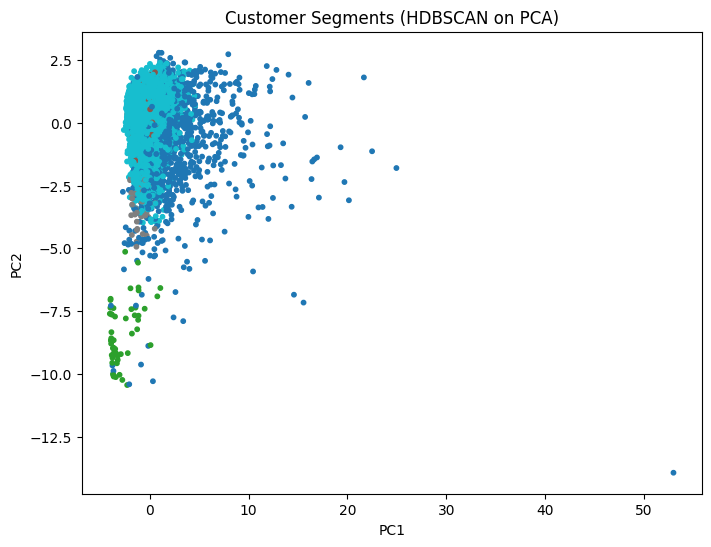

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=best_labels,
    cmap="tab10",
    s=10
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Segments (HDBSCAN on PCA)")
plt.show()

In [ ]:
# why HDBSCAN IS THE CHOSEN ONE
"""Hidden segments are clusters that:

appear only in density-based methods

vanish in KMeans

represent niche but consistent behaviors

were not pre-defined by you"""

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_nopca = imputer.fit_transform(data_ca)

results_nopca = run_unsupervised_pipeline(X_nopca)

results_nopca.sort_values(
    by=["silhouette", "calinski_harabasz"],
    ascending=False
)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,model,n_clusters,noise_ratio,silhouette,davies_bouldin,calinski_harabasz
0,KMeans_k=3,3,0.000000,0.363388,1.639933,2148.229762
8,HDBSCAN,4,0.110465,0.355233,0.978652,1361.275550
4,GMM_k=3,3,0.000000,0.131977,3.505859,846.960606
2,KMeans_k=7,7,0.000000,0.108734,1.665220,1862.843455
1,KMeans_k=5,5,0.000000,0.100847,2.134274,1908.188344
3,KMeans_k=10,10,0.000000,0.098320,1.728400,1650.997165
7,GMM_k=10,10,0.000000,0.088856,2.522942,1131.892345
6,GMM_k=7,7,0.000000,0.087341,2.221891,1095.504635
5,GMM_k=5,5,0.000000,0.069990,3.000169,847.224552


In [ ]:
"""KMeans (k = 3)

Silhouette ≈ 0.36 (good)

Calinski–Harabasz ≈ 2148 (very high)

Noise = 0 (forces everyone into a cluster)


KMeans is very happy because it successfully forced the data into 3 groups.

But forcing ≠ truth.

HDBSCAN

Silhouette ≈ 0.355 (almost same as KMeans)

Davies–Bouldin ≈ 0.97 (best by far)

Noise ≈ 11%


HDBSCAN says: “Look, most points belong together, some form small groups, and some honestly don’t belong anywhere.”

This matches exactly what the plot shows."""

In [ ]:
best_model = hdbscan.HDBSCAN(
    min_cluster_size=50,
    min_samples=10
)

best_labels1 = best_model.fit_predict(X_nopca)

data_ca["cluster"] = best_labels1


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import hdbscan

# 2D projection ONLY for plotting
pca_vis = PCA(n_components=2, random_state=42)
X_vis = pca_vis.fit_transform(X_nopca)

# Fit best model on raw data (based on your table: KMeans k=3 or HDBSCAN)
labels = hdbscan.HDBSCAN(
    min_cluster_size=50,
    min_samples=10
).fit_predict(X_nopca)

plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels, s=15, cmap="tab10")
plt.xlabel("PC1 (only for visualization)")
plt.ylabel("PC2 (only for visualization)")
plt.title("Clustering WITHOUT PCA (trained on raw features)")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


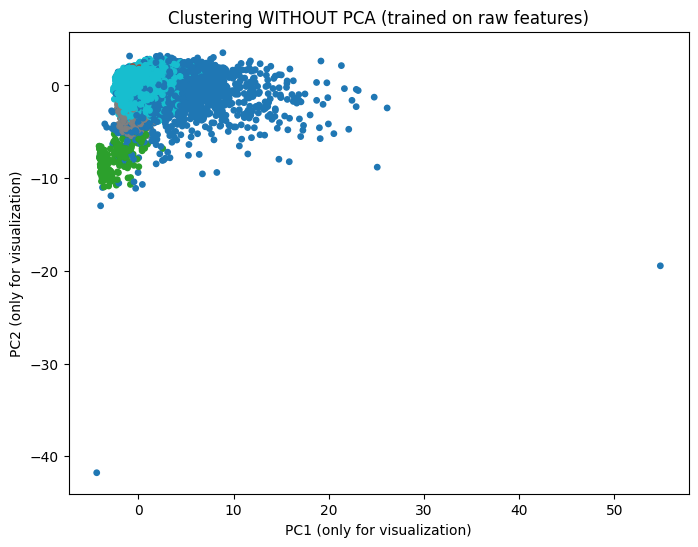

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import hdbscan

# 2D projection ONLY for plotting
pca_vis = PCA(n_components=2, random_state=42)
X_vis = pca_vis.fit_transform(X_nopca)

# Fit best model on raw data (based on your table: KMeans k=3 or HDBSCAN)
labels = hdbscan.HDBSCAN(
    min_cluster_size=50,
    min_samples=10
).fit_predict(X_nopca)

plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels, s=15, cmap="tab10")
plt.xlabel("PC1 (only for visualization)")
plt.ylabel("PC2 (only for visualization)")
plt.title("Clustering WITHOUT PCA (trained on raw features)")
plt.show()

In [ ]:
"""A big dense mass of points at the top

A small tight group at the bottom-left (green)

A few crazy far-out points (one extreme right, one extreme bottom)

This tells us one simple truth:

The data is not evenly separable. Most points behave similarly, a few behave very differently."""


In [ ]:
"""Which is ACTUALLY better?

 PCA + HDBSCAN

Why?

It doesn’t lie

It doesn’t force fake structure

It admits: “Some points don’t belong anywhere”

The clusters actually look meaningful

 Why not  NO-PCA + KMeans

It looks good numerically

But it’s a bit fake

It pretends all customers are nicely segmentable

Real data is never that clean"""

In [14]:
#saving thye best model
import joblib
joblib.dump(best_model, "hdbscan_best_model.pkl")

['hdbscan_best_model.pkl']

In [16]:
joblib.dump(imputer, "imputer.pkl")



['imputer.pkl']

In [ ]:
# now comimng to main part of any unsupervised project the final
#finding of hidden segments and its justification
# this has been acheived and in report file 